# Command: A new tool for building multi-agent architectures in LangGraph


Building agentic and multi-agent systems is all about communication.

Now, nodes can dynamically decide which node to execute next, improving flexibility and simplifying complex workflows.

#### **What's New:**
- **Edgeless graphs:** Nodes no longer need edges to connect. Instead, they can directly specify which node to go to next, making your agent flows more intuitive and adaptable.

- **Enhanced control:** Control the flow after the state update by returning a Command that points to the next node, enabling dynamic, real-time decision-making.

In [ ]:
%%capture --no-stderr
%pip install -U langgraph

Let's learn it with a simple example - An
AI-powered home search engine like: https://flyhomes.com/.


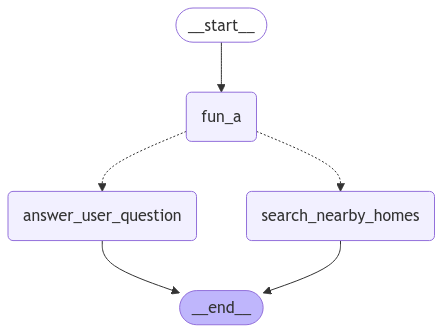

In [3]:
from typing import Literal,Dict
from langchain_core.messages import AIMessage
from langgraph.graph import StateGraph,START,END
from langgraph.types import Command
import random
from typing import Annotated,Dict,Optional,TypedDict
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages:Annotated[list,add_messages]
    address:str
    nearby_homes:Optional[list[Dict]]
 
def fun_a(state:State)->Command[Literal["search_nearby_homes","answer_user_question"]]:
    current_value = random.choice(["search_nearby_homes","answer_user_question"])

    if current_value == "search_nearby_homes":
        goto = "answer_user_question"
    else:
        goto = "answer_user_question"
    return Command(goto=goto,
                   )
def search_nearby_homes(state:State):
    return {'search_nearby':[{"home_1":"arman", "home_2":"usman",}]}
def answer_user_question(state:State):
    return {"messages":[AIMessage(content="please try again later")]}
    
builder = StateGraph(State)
builder.add_node(fun_a)
builder.add_node( search_nearby_homes)
builder.add_node( answer_user_question)
builder.add_edge(START,"fun_a")
builder.add_edge("search_nearby_homes",END)
builder.add_edge("answer_user_question",END)
from IPython.display import display,Image
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
resp = graph.invoke({"address": "Sialkot,Pakistan"})
print(f"resp{resp}")

In [53]:
resp = graph.invoke({"address": "Sialkot,Pakistan"})
print(f"resp") 

TypeError: Command.__init__() got an unexpected keyword argument 'goto'

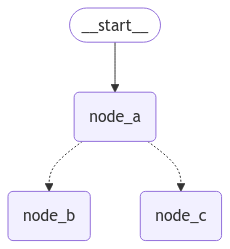

In [67]:
import random
from typing_extensions import TypedDict, Literal

from langgraph.graph import StateGraph, START
from langgraph.types import Command


# Define graph state
class State(TypedDict):
    foo: str


# Define the nodes


def node_a(state: State) -> Command[Literal["node_b", "node_c"]]:
    print("Called A")
    value = random.choice(["a", "b"])
    # this is a replacement for a conditional edge function
    if value == "a":
        goto = "node_b"
    else:
        goto = "node_c"

    # note how Command allows you to BOTH update the graph state AND route to the next node
    return Command(
        # this is the state update
        update={"foo": value},
        # this is a replacement for an edge
        goto=goto,
    )


# Nodes B and C are unchanged


def node_b(state: State):
    print("Called B")
    return {"foo": state["foo"] + "b"}


def node_c(state: State):
    print("Called C")
    return {"foo": state["foo"] + "c"}
builder = StateGraph(State)
builder.add_edge(START, "node_a")
builder.add_node(node_a)
builder.add_node(node_b)
builder.add_node(node_c)
# NOTE: there are no edges between nodes A, B and C!

graph = builder.compile()   


from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [68]:
graph.invoke({"foo": ""})

Called A


TypeError: Command.__init__() got an unexpected keyword argument 'goto'

In [66]:
pip install --upgrade langgraph

  Attempting uninstall: langgraph-checkpoint
    Found existing installation: langgraph-checkpoint 2.0.8
    Uninstalling langgraph-checkpoint-2.0.8:
      Successfully uninstalled langgraph-checkpoint-2.0.8
  Attempting uninstall: langgraph
    Found existing installation: langgraph 0.2.54
    Uninstalling langgraph-0.2.54:
      Successfully uninstalled langgraph-0.2.54
Note: you may need to restart the kernel to use updated packages.


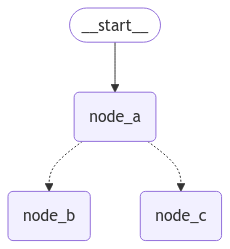

Called A


TypeError: Command.__init__() got an unexpected keyword argument 'goto'

In [72]:
import random
from typing_extensions import TypedDict, Literal
from langgraph.graph import StateGraph, START
from langgraph.types import Command 
class State(TypedDict):
    foo: str 
def node_a(state: State) -> Command[Literal["node_b", "node_c"]]:
    print("Called A")
    value = random.choice(["a", "b"]) 
    if value == "a":
        goto = "node_b"
    else:
        goto = "node_c" 
    return Command( 
        update={"foo": value}, 
        goto=goto,
    )
def node_b(state: State):
    print("Called B")
    return {"foo": state["foo"] + "b"}
def node_c(state: State):
    print("Called C")
    return {"foo": state["foo"] + "c"}
builder = StateGraph(State)
builder.add_edge(START, "node_a")
builder.add_node(node_a)
builder.add_node(node_b)
builder.add_node(node_c) 
graph = builder.compile()   
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))
graph.invoke({"foo": ""})